<a href="https://colab.research.google.com/github/charmy2525/DataAnalytics/blob/main/5_2_Data_Classification_Session_Activity_2_Logistic_Regession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Load Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

activity_data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20Clustering%20-%20Activity1.csv'
A = pd.read_csv(activity_data_file)
A

,X,Y
0,66,12
1,44,46
2,72,38
3,54,4
4,45,58
5,64,8
6,69,4
7,67,4
8,72,38
9,56,12


## Data Clustering using K-Mean

For n_clusters = 2 The average silhouette_score is : 0.5369419239428578
For n_clusters = 3 The average silhouette_score is : 0.5307303629506227
For n_clusters = 4 The average silhouette_score is : 0.4661312522130265
For n_clusters = 5 The average silhouette_score is : 0.4647265978853624
For n_clusters = 6 The average silhouette_score is : 0.4533486010204248
For n_clusters = 7 The average silhouette_score is : 0.44577353962051314
For n_clusters = 8 The average silhouette_score is : 0.4510646345663317
For n_clusters = 9 The average silhouette_score is : 0.4597297807198657
For n_clusters = 10 The average silhouette_score is : 0.43691606853802767


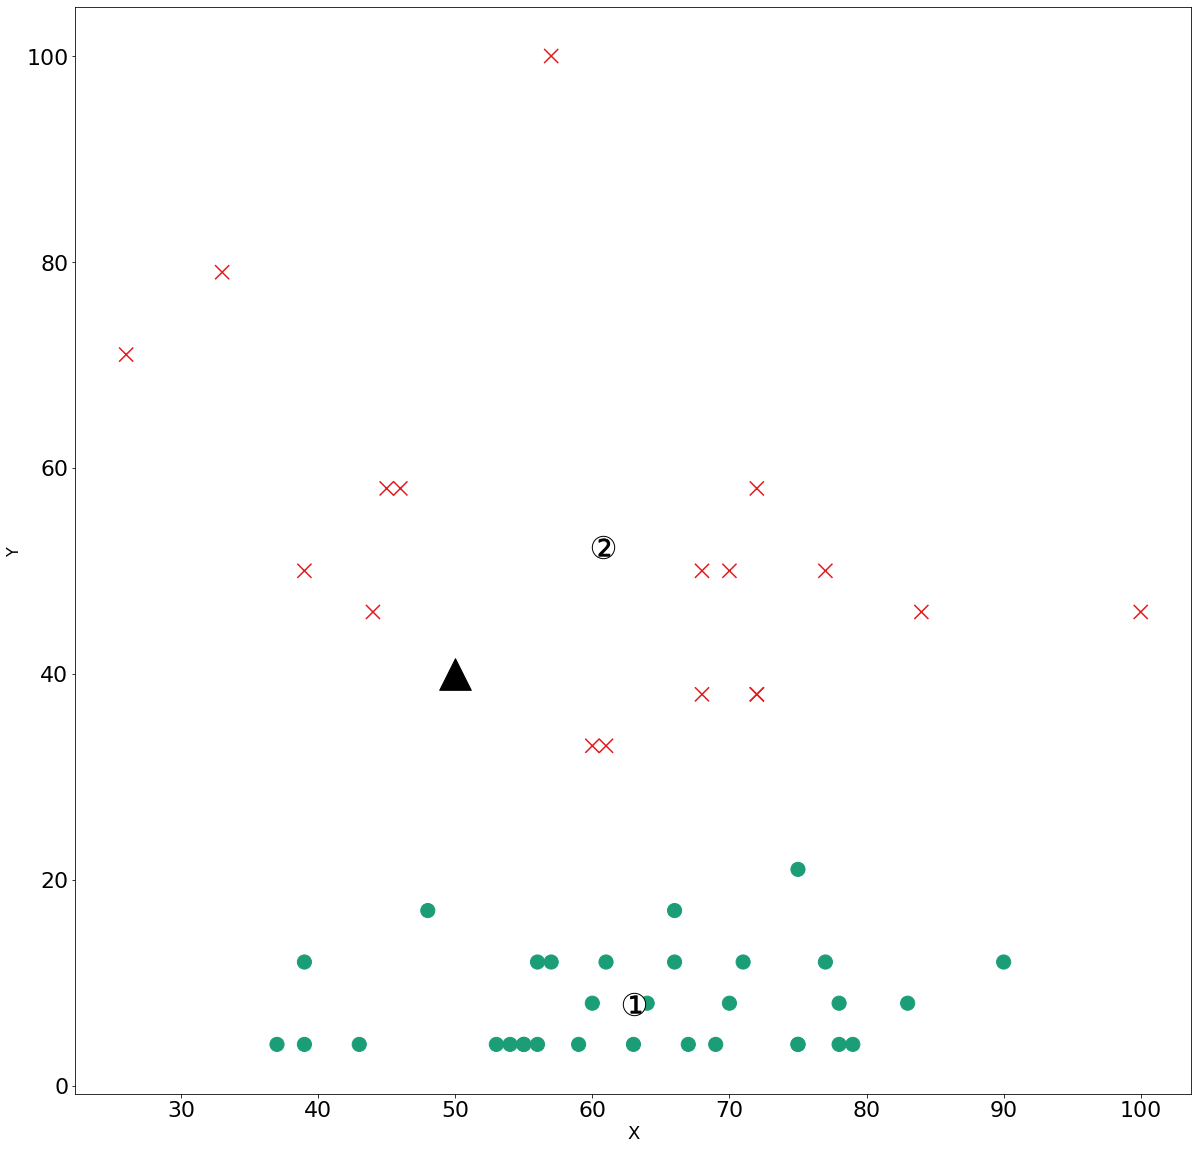

In [ ]:
normalized_df=A

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
min_k = 2
max_k = 10
range_n_clusters = range(min_k,max_k+1)
silhouette_array = []
x_max = min_k
y_max = -1

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(normalized_df)
    cluster_labels = kmeans.fit_predict(normalized_df)

    silhouette_avg = silhouette_score(normalized_df, cluster_labels)
    if silhouette_avg >= y_max :
      x_max = n_clusters
      y_max = silhouette_avg
    silhouette_array.append(silhouette_avg)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)

n_clusters = x_max
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans.fit(normalized_df)
cluster_labels = kmeans.fit_predict(normalized_df)
centroids = kmeans.cluster_centers_
show_df=normalized_df.copy()
show_df['cluster']=cluster_labels.copy()
first_df = show_df[show_df['cluster'] == 0]
second_df = show_df[show_df['cluster'] == 1]

plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 22})
plt.scatter(first_df['X'], first_df['Y'], marker="o",c=first_df['cluster'],cmap='Dark2', alpha=50,s=200)
plt.scatter(second_df['X'], second_df['Y'], marker= 'x', c=second_df['cluster'],cmap='Set1', alpha=50,s=200)

plt.scatter(centroids[:,0], centroids[:,1], marker="o",c="white", alpha=1, s=500, edgecolor="k")
for i, c in enumerate(centroids):
  plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=300, edgecolor="k",c='black')   
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)

plt.scatter(50, 40, marker="^", alpha=1, s=1000, color="black")

plt.show()

## Classification by Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, cluster_labels, test_size=0.2, random_state=42,stratify=cluster_labels)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}’'.format(X_test.shape,y_test.shape))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

from sklearn import metrics
import math

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

print('precision of Logistic Regression : ',precision_score(y_test, y_pred,average='weighted'))
pred = []
run_len=10
print('coefficient = ',logreg.coef_,' intercept = ',logreg.intercept_)
#ตรวจสอบ ความถูกต้อง
if not isinstance(X_test,(np.ndarray)) :
  X_test=X_test.to_numpy() 
for i in range(run_len):
  value = 1/(1+math.e**-(np.matmul(logreg.coef_,X_test[i].transpose())+logreg.intercept_))  
  if len(value) == 1:
    k = 1 if value > 0.5 else 0
  else:
    k=0
    for j in range(1,len(value)) : 
      if value[j] >= value[k] :      
        k=j
    pred.append(k)
  print('Value is ',value,' and be classified as category',k+1)

print('\n')

if len(value) == 1:
  print(f'It will be category 1 if p is greater than 0.5, p = 1/(1+e^-({logreg.intercept_[0]}+{logreg.coef_[0][0]}(X)+{logreg.coef_[0][1]}(Y))')
  print(f'It will be category 2 if p is equal or less than 0.5, p = 1/(1+e^-({logreg.intercept_[0]}+{logreg.coef_[0][0]}(X)+{logreg.coef_[0][1]}(Y))')
else:
  for j in range(0,len(value)) : 
    print(f'It will be category {j+1} if p{j} is maximum, p{j} = 1/(1+e^-({logreg.intercept_[0]}+{logreg.coef_[j][0]}(X)+{logreg.coef_[j][1]}(Y))')

newdata = np.array([[50,40]])
sample_pred=logreg.predict(newdata)
print('\ncategory of new data is ',sample_pred[0]+1,'\n')

Train Shape X: (40, 2) Y : (40,)
Test Shape X: (10, 2) Y : (10,)’
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

precision of Logistic Regression :  1.0
coefficient =  [[-0.06793176  0.58258031]]  intercept =  [-11.02915688]
Value is  [3.03040999e-06]  and be classified as category 1
Value is  [7.78851348e-07]  and be classified as category 1
Value is  [0.99995739]  and be classified as category 2
Value is  [8.33598533e-07]  and be classified as category 1
Value is  [1.47575979e-05]  and be classified as category 1
Value is  [1.]  and be classified as category 2
Value is  [1.]  and be classified as category 2
Value is  [1.]  and be classified as category 2
Value is  [0.00014174]  and be classified as category 1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


การประเมินประสิทธิภาพของการ Classification https://en.wikipedia.org/wiki/Precision_and_recall

## Confusion Matrix

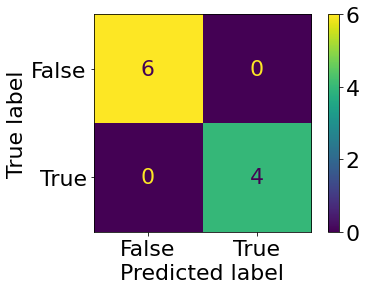

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()